# Quantum Mentorship Program - Task 4 The NISQ Devices
## Extra investigation - Number of qubits and computational times

In this extra I apply the SWAP same circuit to 2 generic states $|\psi \rangle$, $|\phi \rangle$ and see the effect of the fidelity as the polarization gate error is increased. Furthermore this allow me to explore to bigger systems, arriving up tp 12 qubits. 

Doing these experiments one of the main limitations of simulators is seen, ie. the scaling. I noted that increasing by 2 qubits(adding a qubit to each state), would on average increase the computational time by a factor of 25. Crazy values! 

In [11]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from Task4_functions import *
import time

In [12]:
def create_random_quantum_state(n_qubits_list):
    ''' 
    Create a list of normalized quantum states with real and complex parts.

    n_qubits_list (list[int]): List of with the number of qubits for each investigation
    '''
    quantum_states = []
    for i in n_qubits_list:
        state1 = (2*np.random.rand(2**(i//2)) - 1) + (complex(0,2)*np.random.rand(2**(i//2)) - complex(0,1))
        state1 = state1/np.linalg.norm(state1)

        state2 = (2*np.random.rand(2**(i//2)) - 1) + (complex(0,2)*np.random.rand(2**(i//2)) - complex(0,1))
        state2 = state2/np.linalg.norm(state2)
        
        quantum_states.append([state1, state2])
    return quantum_states

# Number of qubits

In [13]:
seed = np.random.seed(1234)

n_qubits_list = [2,4,6,8,10]
states = create_random_quantum_state(n_qubits_list)

operations_list = create_operations_list(states, n_qubits_list)
devices = create_device_list(n_qubits_list, shots='None')
circuits = create_circuit_list(devices, n_qubits_list)

In [14]:
#Calculate the density matrices of the SWAP circuit without noise
p_values = np.linspace(0, 0, 1)
zeros_noise_results = density_matrix_results(circuits, n_qubits_list, operations_list, p_values)

#Calculate the density matrices of the SWAP circuit with noise
p_values = np.linspace(0, 0.5, 150)
noisy_results = density_matrix_results(circuits, n_qubits_list, operations_list, p_values)

#Calculate the fidelity between noisy and noiseless density matrices
fidelties = calc_fidelity(zeros_noise_results, noisy_results, n_qubits_list, p_values)

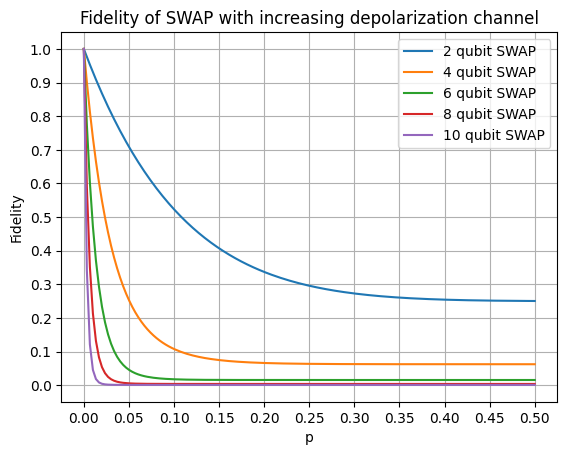

In [15]:
for i in range(len(n_qubits_list)):
    label = f'{n_qubits_list[i]} qubit SWAP'
    plt.plot(p_values, fidelties[:, i], label = label)
plt.legend()
plt.ylabel('Fidelity')
plt.xlabel('p')
plt.xticks(np.linspace(0, 0.5,11))
plt.yticks(np.linspace(0, 1, 11))
plt.title('Fidelity of SWAP with increasing depolarization channel')
plt.grid()

In [16]:
specs_fun = create_specs_list(circuits, n_qubits_list, operations_list)
num_gates = create_num_gate_list(specs_fun, n_qubits_list)
num_polarization_gates = create_num_depolarization_gates_list(specs_fun, n_qubits_list)

for i in range(len(n_qubits_list)):
    print(f'The SWAP of {n_qubits_list[i]} qubits requires {num_gates[i]} gates and has {num_polarization_gates[i]} depolarization gates')

The SWAP of 2 qubits requires 7 gates and has 10 depolarization gates
The SWAP of 4 qubits requires 23 gates and has 34 depolarization gates
The SWAP of 6 qubits requires 55 gates and has 82 depolarization gates
The SWAP of 8 qubits requires 119 gates and has 178 depolarization gates
The SWAP of 10 qubits requires 247 gates and has 370 depolarization gates


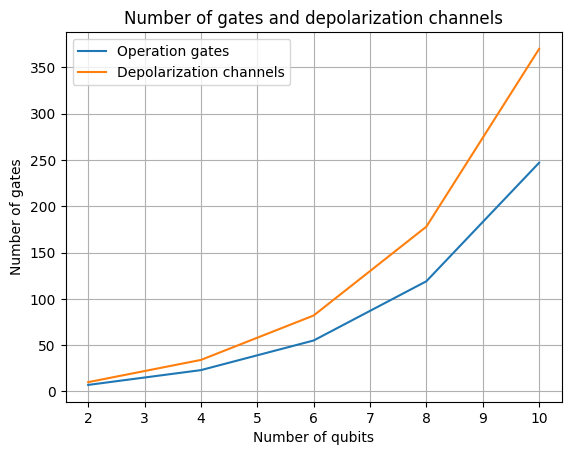

In [17]:
plt.ylabel('Number of gates')
plt.xlabel('Number of qubits')
plt.title('Number of gates and depolarization channels')
plt.grid()
plt.plot(n_qubits_list, num_gates, label='Operation gates')
plt.plot(n_qubits_list, num_polarization_gates, label='Depolarization channels')
plt.legend()

# Computational times

In [18]:
seed = np.random.seed(1234)

n_qubits_list = [2,4,6,8,10, 12]
states = create_random_quantum_state(n_qubits_list)

operations_list = create_operations_list(states, n_qubits_list)
devices = create_device_list(n_qubits_list, shots='None')
circuits = create_circuit_list(devices, n_qubits_list)

In [19]:
time_list = []
for i in range(len(circuits)):
        start = time.time()
        circuits[i](
                p = 0.5, 
                n_qubits = n_qubits_list[i], 
                list_ops_state_1 = operations_list[i][0], 
                list_ops_state_2 = operations_list[i][1]
                )
        stop = time.time()
        time_list.append(stop-start)

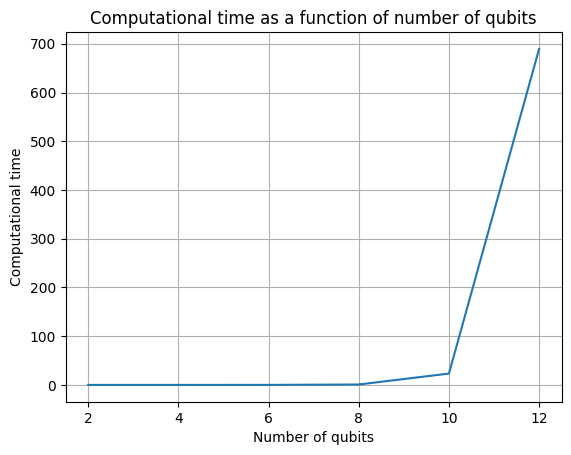

In [20]:
plt.plot(n_qubits_list, time_list)
plt.ylabel('Computational time')
plt.xlabel('Number of qubits')
plt.title('Computational time as a function of number of qubits')
plt.grid()